<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [5]:
# Load the data
data= pd.read_csv('HR_comma_sep.csv')
df= data.copy()

In [7]:
# Find the shape
df.shape

(14999, 10)

In [9]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
# Find the data types of columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [13]:
# Find the basic statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
# Find the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Find out the how many employees left the company?**

Total Employees that left are 3571


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='left', ylabel='Count'>

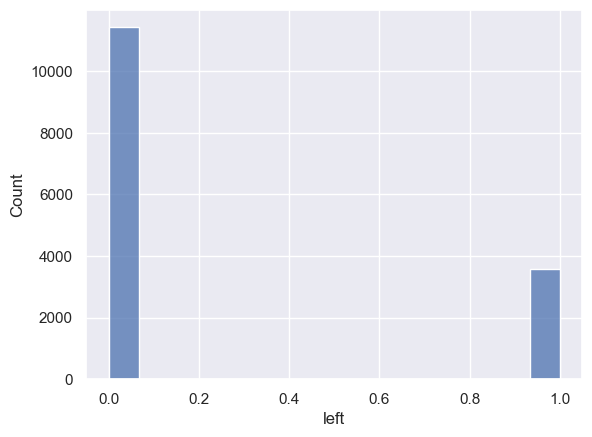

In [20]:
# Count of how many employees left the company
employes_left = df['left'].value_counts()[1]
print(f'Total Employees that left are {employes_left}')
sns.histplot(data=df['left'])

**Question:What can you interpret from the plot above?** 

Answer:
- Majority of the employes stay in the company as compared to the number of people that have left.

**Task 3: Find out the number of projects being handled.**

The number of projects being handled by all the employees are: 57042


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='number_project', ylabel='Count'>

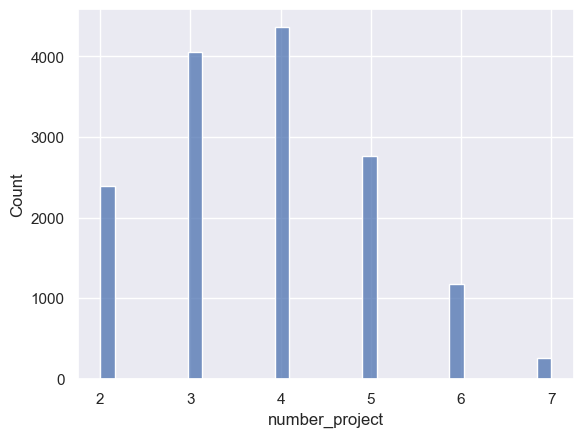

In [25]:
# Write code here
print(f'The number of projects being handled by all the employees are: {df["number_project"].sum()}')
sns.histplot(data=df, x='number_project')

**Question: What insights can you infer from the above plot?**

**Answer:** (Adding the number of employees for two categories of 'number of projects')
- Most commonly in the company, an employee is handling 3 or 4 projects, there are about more than 8000 employees in this category.
- Almost 5500 employees are handling 2 or 5 projects.
- There are very few employees that handle 6 or 7 projects, less than 1500.

**Task 4: Find out how number of projects contributed to employee turn-over.**
<br>
<br>

<Axes: xlabel='number_project', ylabel='left'>

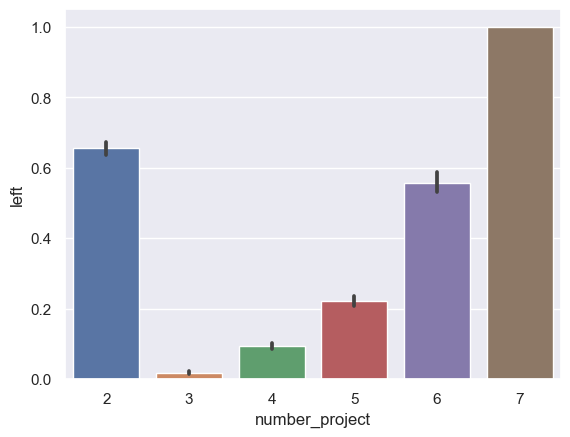

In [43]:
sns.barplot(data=df, x='number_project', y='left')

**Task 5:** Make a plot of your findings (only turn-over employees)

<Axes: xlabel='number_project', ylabel='count'>

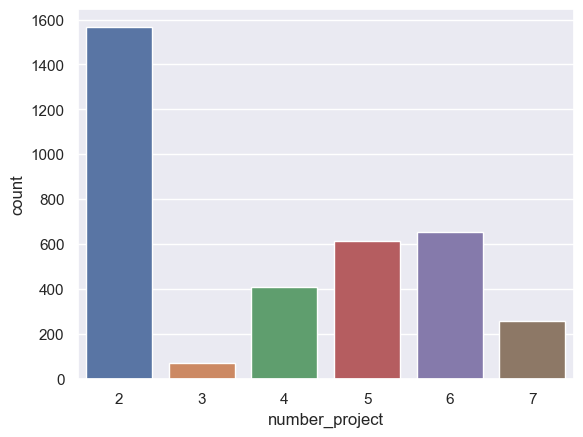

In [41]:
df1 = df[df['left']==1]
sns.countplot(data=df1, x='number_project')

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

**Answer:**
- It can be concluded from the above plots that:
- Emoloyees with least amount of projects i.e. 2. have a small probability to leave the company, probably due to less pay.
- Emoloyees that have 3, 4 or 5 projects are less likely to leave, due to somewhat better pay and less work load.
- Emoloyees with 6 projects are a likely to leave.
- Emoloyees with Most amount of projects i.e. 7 projects, leave the company most due to work load.

## **Time spent at the company**

**Task 6: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

<Axes: xlabel='time_spend_company', ylabel='count'>

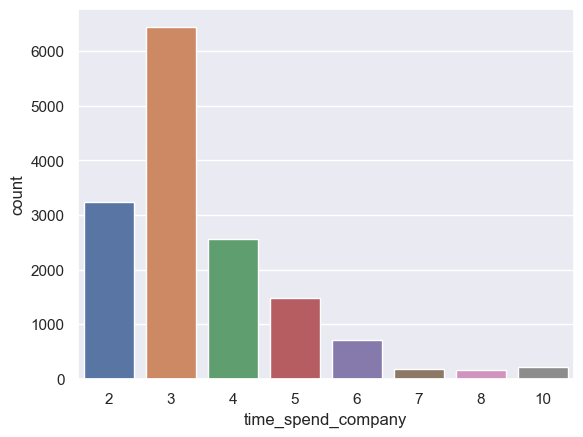

In [125]:
sns.countplot(data=df, x='time_spend_company')

<Axes: xlabel='time_spend_company', ylabel='left'>

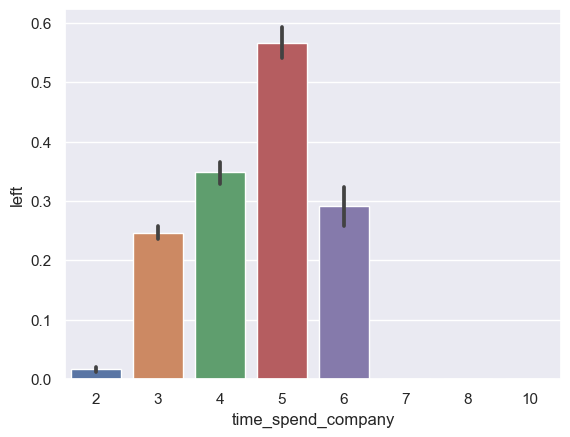

In [121]:
# Show the plot for the count of years here
sns.barplot(data=df, x='time_spend_company', y='left')

In [53]:
# finding the maximum duration of employees in the company
df['time_spend_company'].unique().max()

10

**Question: What is the maximum number of time spend by the employees?**

**Answer:**
- The maximum number of years an employee stayed in the company is 10 years.

In [233]:
# Write the code here to get the percentage of employees leaving.
emp_left = df[df['left']==1].shape[0]
total_emp = df.shape[0]
precentage = emp_left/total_emp
print(f'Precentage of emloyees that left is {precentage* 100:.2f}%')

Precentage of emloyees that left is 23.81%


<Axes: xlabel='time_spend_company', ylabel='count'>

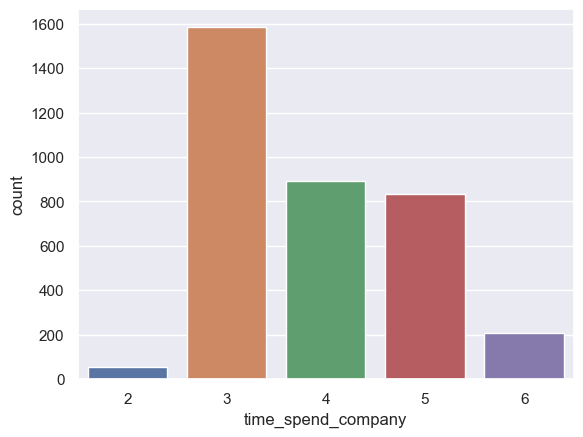

In [87]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
sns.countplot(data=df[df['left']==1], x='time_spend_company')

**Question: After what time period are employees most likely to leave the company ?**

**Answer:**
- After 3 years employees are most likely to leave 

## **Employees engaged in any work accident**

**Task 7: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

<Axes: xlabel='Work_accident', ylabel='count'>

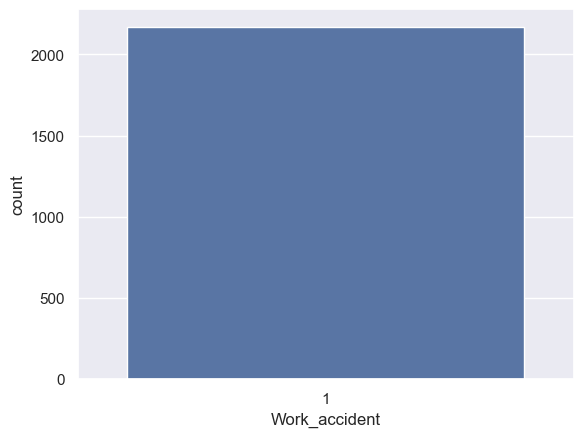

In [114]:
# Number of employees involved in work accident
df1 = df[df['Work_accident']==1]
sns.countplot(data=df1, x='Work_accident')
# df[df['Work_accident']==1].shape

**Question: What can you conclude from the graph above?**

**Answer:**
- The above graph shows that more than 2100 employess were involved in accidents at work.

In [158]:
# checking how many empoloyees left after being in an accident
df1['left'].value_counts()

left
0    2000
1     169
Name: count, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

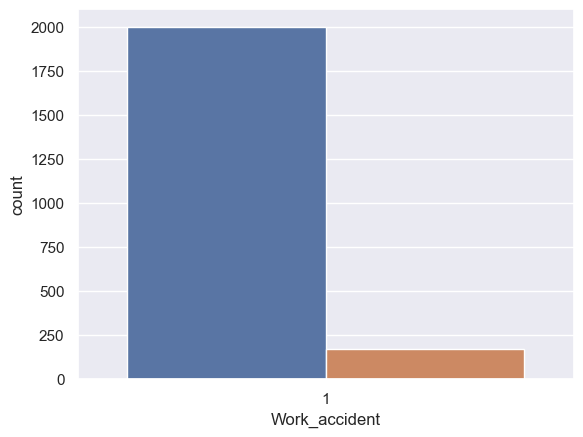

In [156]:
# Number of employees involved in work accident and left or not left
sns.countplot(data=df1, x='Work_accident', hue='left')

## **Promotions in last 5 years**

**Task 8: How many number of employees got the promotion in last 5 year and how many of them left?**

In [192]:
# Write code here
df1 = df[df['promotion_last_5years']==1]
emp_left = df1[df1['left'] == 1]['left'].sum()
prom = df1.shape[0]
print(f'Number of Promotions in last 5 year are {prom} out of which {emp_left} left the company')

Number of Promotions in last 5 year are 319 out of which 19 left the company


**Answer:**
- A total of 319 employees got promotion in last 5 years.
- Out of 319 employees only 19 left the company

## **Salary trends**

**Task 9: What are the salary trends in the data? Use graphical representation for explanation**

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary', ylabel='Count'>

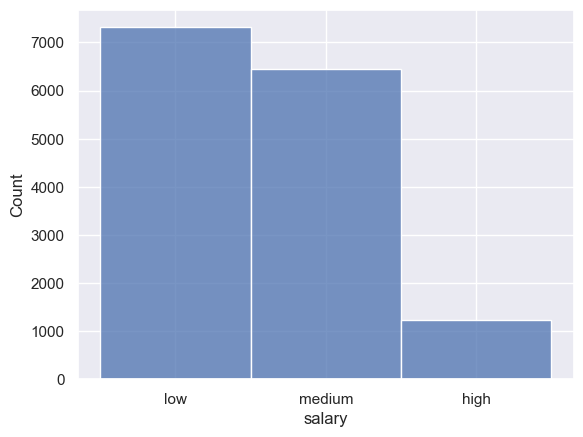

In [206]:
#Write code here
sns.histplot(data=df, x='salary')

**Answer:**
- Employess with low and medium salaries have the higest count.

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

In [251]:
# Write code here
left_salary = df[df['left']==1]['salary'].value_counts(normalize=True)*100
left_salary

salary
low       60.823299
medium    36.880426
high       2.296276
Name: proportion, dtype: float64

<Axes: xlabel='salary'>

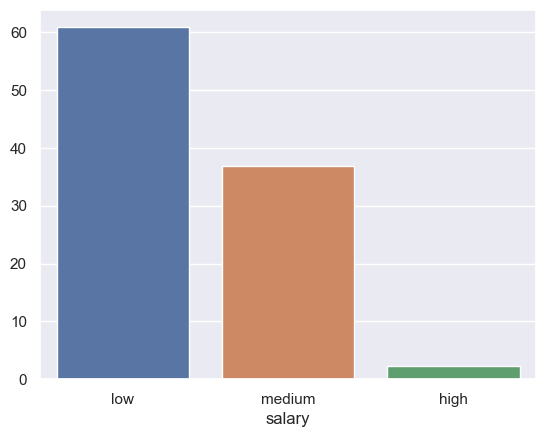

In [255]:
# Write code here for plot
sns.barplot(x=left_salary.index, y=left_salary.values)

**Question: What does the above plot show?**

**Answer:**
- Higest percentage of employees that left is from low paid class
- second higest percentage of employees that left are fom medium paid class
- least precentage of employees that left are from high paid class

## **Employees per Department**

**Task 10: Find out employees per department and also see which which department has highest number of employees leaving the company.**

In [291]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.
emp_dpt = df['dept'].value_counts()
print(emp_dpt)

dept
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


In [289]:
emp_dpt_lft = df[df['left']==1]['dept'].value_counts()
print(emp_dpt_lft)

dept
sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: count, dtype: int64


**Question: Which department has maximum number of employees?**

**Answer:**
- The maximum number of employees are from Sales department
-  Sales also have the higest number of employees leaving.

**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

In [318]:
# Write code here
dept_turnover = df.groupby('dept')['left'].mean().sort_values(ascending=False) *100
dept_turnover

dept
hr             29.093369
accounting     26.597132
technical      25.625000
support        24.899058
sales          24.492754
marketing      23.659674
IT             22.249389
product_mng    21.951220
RandD          15.374841
management     14.444444
Name: left, dtype: float64

<Axes: ylabel='dept'>

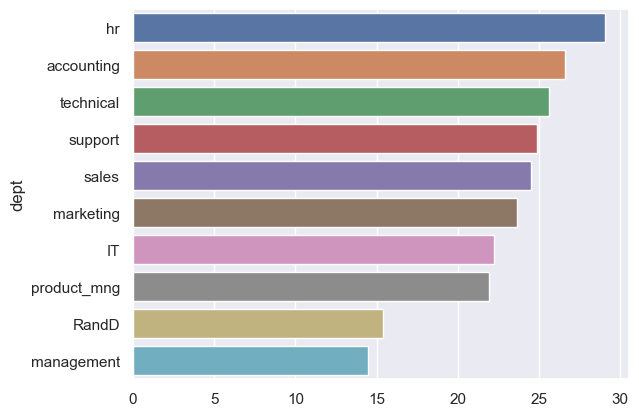

In [320]:
# Write code here to draw the plot
# Showing the values sideways to avoid confusion.
sns.barplot( x=dept_turnover.values, y=dept_turnover.index)

**Answer:**
- The higest turnover can be seen in HR department

## **Satisfaction Level**

**Task 11: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='satisfaction_level', ylabel='Density'>

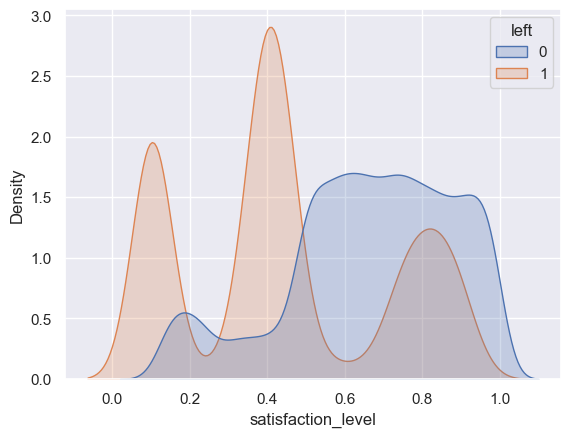

In [341]:
# Write the code here
sns.kdeplot(data=df, x='satisfaction_level', hue='left', fill=True, common_norm=False)

**Question: What can you conclude from the plot above?**

**Answer:**
- The employees that are still in the employment of the company are more satisfied than the ones that left.
- Employees in the range of 0.2 - 0.4 are highly likely to leave.
- Employees in the range of 0.4 - 0.6 are in the buffer zone, its hard to determine wether they will stay or leave the company.
- Employees in the range of 0.6 - 1.0 are highly likely to stay.

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 12: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [387]:
df['satisfaction_level_type'] = df['satisfaction_level'].apply(lambda x: 'High' if x>=0.5 else 'Low')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low
3,0.72,0.87,5,223,5,0,1,0,sales,low,High
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low


**Task 13: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

AttributeError: 'numpy.int64' object has no attribute 'startswith'

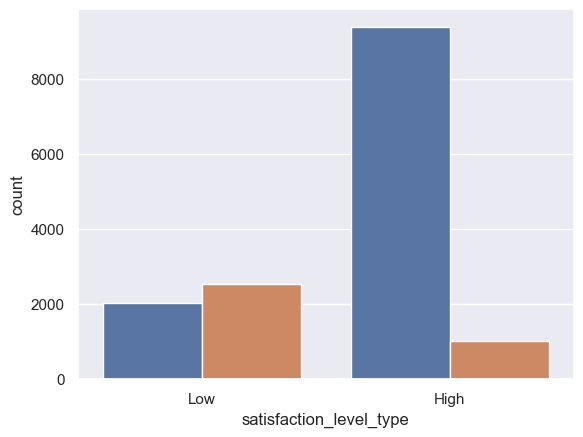

In [389]:
# Write Code Here
sns.countplot(data=df, x='satisfaction_level_type', hue='left')

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

In [465]:
# Write Code Here
summary = df.groupby(['satisfaction_level_type', 'number_project']).size().unstack()
summary

number_project,2,3,4,5,6,7
satisfaction_level_type,,,,,,
High,591,3504,3807,2281,228,5
Low,1797,551,558,480,946,251


**Make a Plot of your findings**

AttributeError: 'numpy.int64' object has no attribute 'startswith'

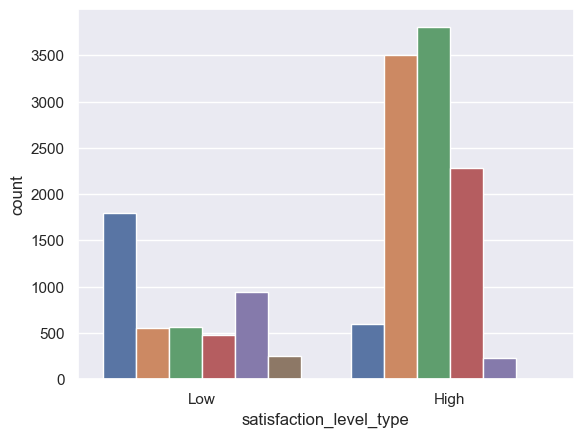

In [471]:
sns.countplot(data=df, x='satisfaction_level_type', hue='number_project')

**Question:** What did you infer from the above plot

**Answer:**
- Employees with higher satisfaction levels have 3,4 or 5 projects commonly.
- Employees with 7 projects are least satisfied

Now lets check number of projects for low satisfaction level

In [483]:
# Write Code Here
df[df['satisfaction_level_type'] == 'Low']['number_project'].sum()

17312

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Task 14: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [485]:
df['employee_type']= ''

In [501]:
# Write code here
df['employee_type']= df['number_project'].apply(lambda x: 'Unburdened' if x == 2 else 'Satisfactory' if 3 <= x <= 5 else 'Burdened')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type,employee_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low,Unburdened
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High,Satisfactory
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low,Burdened
3,0.72,0.87,5,223,5,0,1,0,sales,low,High,Satisfactory
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low,Unburdened
...,...,...,...,...,...,...,...,...,...,...,...,...
14992,0.40,0.48,2,155,3,0,1,0,support,low,Low,Unburdened
14993,0.76,0.83,6,293,6,0,1,0,support,low,High,Burdened
14994,0.40,0.57,2,151,3,0,1,0,support,low,Low,Unburdened
14995,0.37,0.48,2,160,3,0,1,0,support,low,Low,Unburdened


**Task 15: Make a countplot to see which type of employee is leaving**

<Axes: xlabel='left', ylabel='count'>

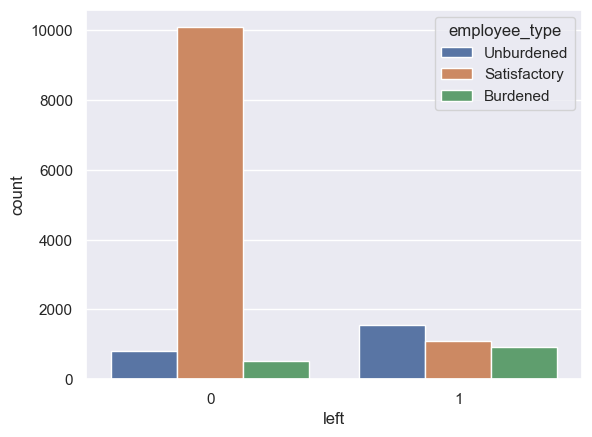

In [505]:
# Write code here
sns.countplot(data=df, x='left', hue='employee_type')

### Remove Redundant Features

Hint: Look for the columns used in Feature Engineering

In [507]:
# Write code here
df.drop(columns=['number_project','satisfaction_level'], inplace=True, axis=1)

In [509]:
df.columns

Index(['last_evaluation', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'dept', 'salary',
       'satisfaction_level_type', 'employee_type'],
      dtype='object')

# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**Task 16: Do ONE HOT ENCODING of the above mentioned variables**

In [512]:
# Write code here
df_onehot = pd.get_dummies(df, columns=['dept', 'salary', 'satisfaction_level_type', 'employee_type'])
df_onehot.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_Unburdened
0,0.53,157,3,0,1,0,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
1,0.86,262,6,0,1,0,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
2,0.88,272,4,0,1,0,False,False,False,False,...,False,False,False,False,True,False,True,True,False,False
3,0.87,223,5,0,1,0,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,0.52,159,3,0,1,0,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True


In [514]:
df_onehot.shape

(14999, 24)

**Task 17: Creating Independant and Dependant Variables**

In [516]:
# Write code here
X = df_onehot.drop(columns=['left'], axis=1)
Y = df_onehot['left']

In [518]:
print(f'shape of X {X.shape}, shape of Y {Y.shape}')

shape of X (14999, 23), shape of Y (14999,)


**Task 18: Perform Train Test Split with test size 30 percent and random state = 100**

In [521]:
from sklearn.model_selection import train_test_split

In [526]:
#Write code here
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100, shuffle=True)

In [530]:
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(10499, 23) (10499,)
(4500, 23) (4500,)


**Task 19: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [532]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [542]:
# Making instance and training the model
rfc = RandomForestClassifier(n_estimators=100, random_state=100)

rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=100)

In [546]:
# Get predictions
rf_pred = rfc.predict(x_test)
rf_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

**Precision**

In [548]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import precision_score

In [550]:
#Write the code to calculate
rf_precion= precision_score(y_test, rf_pred)
rf_precion

0.9733700642791552

**Accuracy**

In [552]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score

In [554]:
# Write the code to calculate
rf_acc=accuracy_score(y_test, rf_pred)
rf_acc

0.9848888888888889

**Recall**

In [556]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import recall_score

In [558]:
# Write the code to calculate
rf_recall= recall_score(y_test, rf_pred)
rf_recall

0.9645131938125568

**F1-Score**

In [560]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score

In [566]:
# Write the code to calculate
rf_f1_score= f1_score(y_test, rf_pred)
rf_f1_score

0.9689213893967094

**Classification Report**

In [568]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report

In [572]:
#Write the code to calculate
cl_rp = classification_report(y_test, rf_pred)
print(cl_rp)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.97      0.96      0.97      1099

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



## Logistic Regression

In [574]:
# Import the model
from sklearn.linear_model import LogisticRegression

In [578]:
# Create instance and train, random _state=100
lr = LogisticRegression(random_state=100)

lr.fit(x_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [586]:
# get the predictions
lr_pred= lr.predict(x_test)
lr_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

**Accuracy**

In [588]:
#Write the code here
lr_accuracy= accuracy_score(y_test, lr_pred)
lr_accuracy

0.862

**Precision**

In [590]:
#Write the code here
lr_precision= precision_score(y_test, lr_pred)
lr_precision

0.734313725490196

**Recall**

In [592]:
#Write the code here
lr_recall= recall_score(y_test, lr_pred)
lr_recall

0.6815286624203821

**F1 Score**

In [594]:
#Write the code here
lr_f1_score= f1_score(y_test, lr_pred)
lr_f1_score

0.7069372345445966

**Classification Report**

In [598]:
#Write the code here
lr_cl_rp = classification_report(y_test, lr_pred)
print(lr_cl_rp)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3401
           1       0.73      0.68      0.71      1099

    accuracy                           0.86      4500
   macro avg       0.82      0.80      0.81      4500
weighted avg       0.86      0.86      0.86      4500



## Ada Boost

In [600]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier

In [604]:
#Write the code here to make an instance and train the model with random state =100
ada_cl = AdaBoostClassifier(random_state=100)

ada_cl.fit(x_train, y_train)

AdaBoostClassifier(random_state=100)

In [610]:
# Get the predictions
pred_clf_adb= ada_cl.predict(x_test)
pred_clf_adb

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

**Accuracy**

In [613]:
#Write code here
ab_accuracy= accuracy_score(y_test, pred_clf_adb)
ab_accuracy

0.9182222222222223

**Precision**

In [615]:
#Write code here
ab_precision= precision_score(y_test, pred_clf_adb)
ab_precision

0.8350137488542622

**Recall**

In [617]:
#Write code here
ab_recall= recall_score(y_test, pred_clf_adb)
ab_recall

0.8289353958143767

**F1-Score**

In [619]:
#Write code here
ab_f1_score= f1_score(y_test, pred_clf_adb)
ab_f1_score

0.8319634703196347

**Classification Report**

In [623]:
#Write code here
ada_cl_rp = classification_report(y_test, pred_clf_adb)
print(ada_cl_rp)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3401
           1       0.84      0.83      0.83      1099

    accuracy                           0.92      4500
   macro avg       0.89      0.89      0.89      4500
weighted avg       0.92      0.92      0.92      4500



## XG Boost

In [625]:
#Write the code here to import the model
from sklearn.ensemble import GradientBoostingClassifier

In [627]:
#Write the code here to make an instance and train the model with random state =100
xgb = GradientBoostingClassifier(n_estimators=100, random_state=100)

xgb.fit(x_train, y_train)

GradientBoostingClassifier(random_state=100)

In [631]:
# Get the predictions
pred_clf_xgb= xgb.predict(x_test)
pred_clf_xgb

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

**Accuracy**

In [633]:
#Write code here
xgb_accuracy= accuracy_score(y_test, pred_clf_xgb)
xgb_accuracy

0.9644444444444444

**Precision**

In [635]:
#Write code here
xgb_precision= precision_score(y_test, pred_clf_xgb)
xgb_precision

0.9327188940092166

**Recall**

In [637]:
#Write code here
xgb_recall= recall_score(y_test, pred_clf_xgb)
xgb_recall

0.9208371246587808

**F1-Score**

In [639]:
#Write code here
xgb_f1_score= f1_score(y_test, pred_clf_xgb)
xgb_f1_score

0.9267399267399268

**Classification Report**

In [641]:
#Write code here
xgb_cl_rp = classification_report(y_test, pred_clf_xgb)
print(xgb_cl_rp)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3401
           1       0.93      0.92      0.93      1099

    accuracy                           0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



# Result Comparisons

**Task 20: Do the comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [701]:
num = [100,150,200,250,300,350,450]
logistic = []
random_forest = []
xg_boost = []
ada_boost = []
for i in range(len(estimators)):
    lr = LogisticRegression(max_iter=num[i], random_state=100)
    lr.fit(x_train, y_train)
    logistic.append(lr.predict(x_test))

    rf_cl = RandomForestClassifier(n_estimators=num[i], random_state=100)
    rf_cl.fit(x_train, y_train)
    random_forest.append(rf_cl.predict(x_test))
    
    ada_bst = AdaBoostClassifier(n_estimators=num[i], random_state=100)
    ada_bst.fit(x_train, y_train)
    ada_boost.append(ada_bst.predict(x_test))
    
    xg_bst = GradientBoostingClassifier(n_estimators=num[i], random_state=100)
    xg_bst.fit(x_train, y_train)
    xg_boost.append(xg_bst.predict(x_test))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [703]:
models = {
    "Logistic Regression": logistic,
    "Random Forest": random_forest,
    "AdaBoost": ada_boost,
    "Gradient Boosting": xg_boost
}

# Prepare to store the results
results = []

# Calculate metrics for each model at each estimator
for model_name, predictions in models.items():
    for i, pred in enumerate(predictions):
        report = classification_report(y_test, pred, output_dict=True, zero_division=0)
        precision = report['1']['precision']
        recall = report['1']['recall']
        f1 = report['1']['f1-score']
        accuracy = report['accuracy']
        
        results.append({
            "Model": model_name,
            "Estimators": estimators[i],
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Accuracy": accuracy
        })

# Convert to DataFrame for easier analysis and plotting
df_results = pd.DataFrame(results)
print(df_results)

                  Model  Estimators  Precision    Recall  F1 Score  Accuracy
0   Logistic Regression           5   0.734314  0.681529  0.706937  0.862000
1   Logistic Regression          10   0.732877  0.681529  0.706271  0.861556
2   Logistic Regression          20   0.731445  0.681529  0.705605  0.861111
3   Logistic Regression          40   0.728335  0.680619  0.703669  0.860000
4   Logistic Regression          80   0.727361  0.679709  0.702728  0.859556
5   Logistic Regression         100   0.728335  0.680619  0.703669  0.860000
6   Logistic Regression         200   0.727626  0.680619  0.703338  0.859778
7         Random Forest           5   0.973370  0.964513  0.968921  0.984889
8         Random Forest          10   0.974241  0.963603  0.968893  0.984889
9         Random Forest          20   0.973346  0.963603  0.968450  0.984667
10        Random Forest          40   0.972452  0.963603  0.968007  0.984444
11        Random Forest          80   0.973346  0.963603  0.968450  0.984667

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

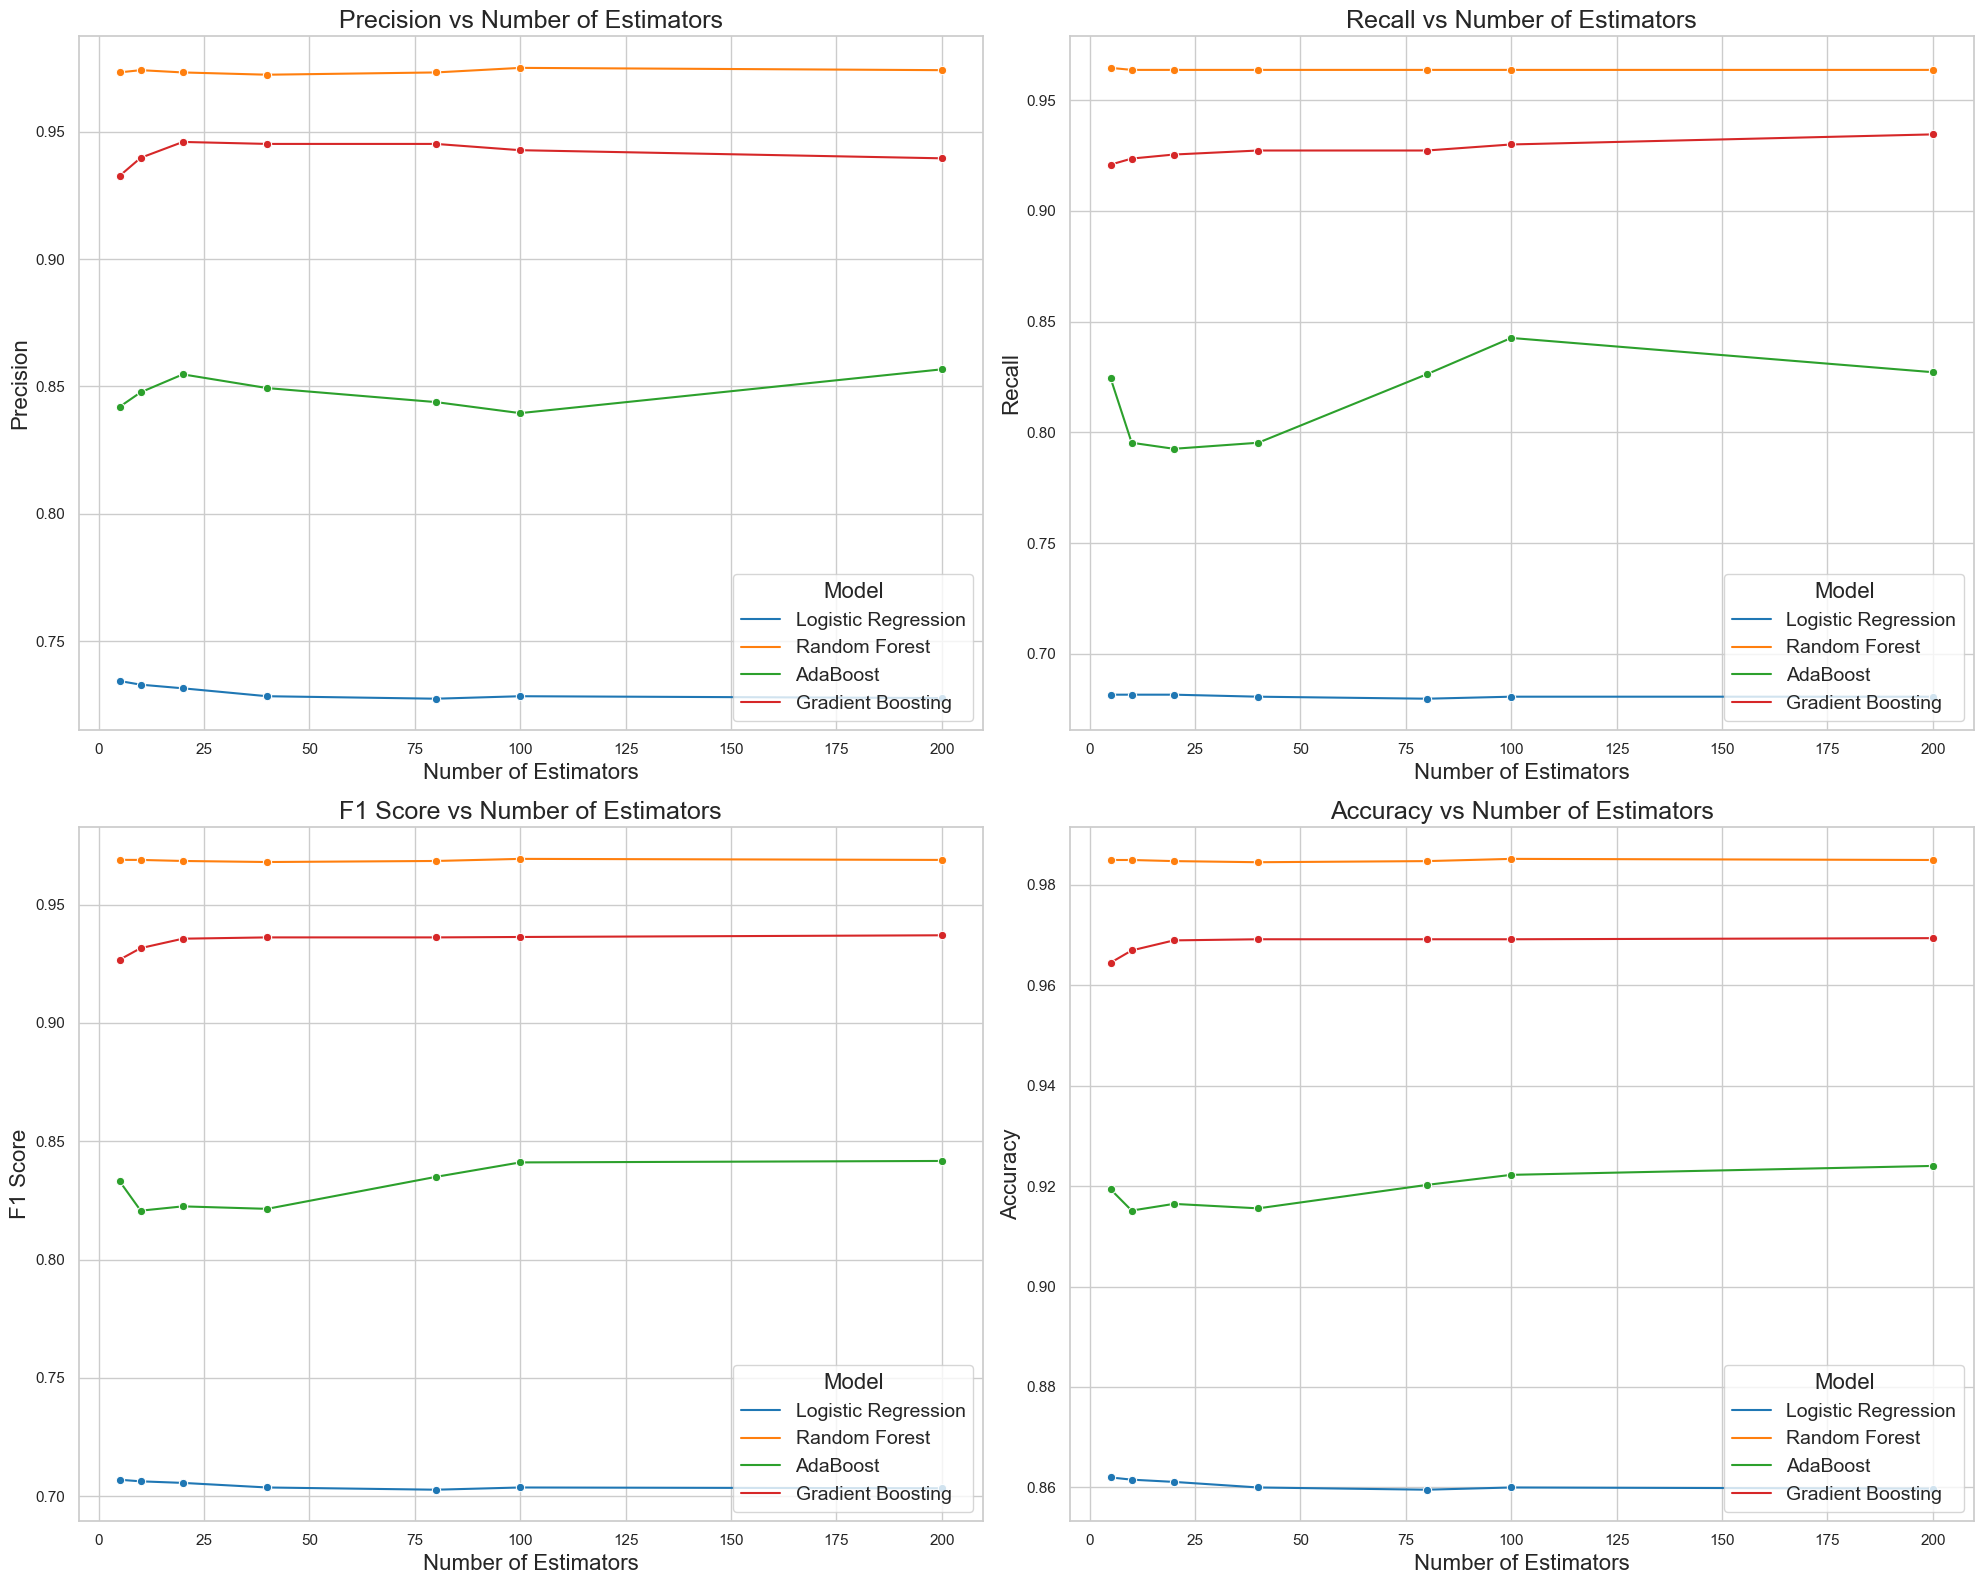

In [705]:
# Plotting to find the best fit model
sns.set(style="whitegrid")
plt.figure(figsize=(20, 16))

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Different colors for each model

# Plot each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(
        data=df_results, 
        x='Estimators', 
        y=metric, 
        hue='Model', 
        marker='o', 
        palette=colors
    )
    plt.title(f'{metric} vs Number of Estimators', fontsize=18)
    plt.ylabel(metric, fontsize=16)
    plt.xlabel('Number of Estimators', fontsize=16)
    plt.legend(title='Model', fontsize=14, title_fontsize=16)

plt.tight_layout()
plt.show()

**Task 21: Which model has the best score? Do you think that you need to apply any sort of tunning on the model selected. If Yes, then apply it conclude with the final scores of the best model.**

**Answer:**
- As shown in the above plot, Random Forest gives the best Precision, Recall, F1 Score and Accuracy.